In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyEclipseDVH import eclipse_DVH
from scipy import interpolate

def get_Dmetric(df, metric_pct):   # for D50% pass 50
    indexes = np.array(df.index)   # get test data index and values
    values = np.array(df.values)
    f = interpolate.interp1d(values, indexes)  # create the interp object
    return f(metric_pct)

def get_HI(df):   # for D50% pass 50
    indexes = np.array(df.index)   # get test data index and values
    values = np.array(df.values)
    f = interpolate.interp1d(values, indexes)  # create the interp object
    HI = (f(2.0) - f(98.0))/f(50.0)
    return HI

In [2]:
AAA = eclipse_DVH('Case3_AAA.txt')
AXB = eclipse_DVH('Case3_Dm.txt')

Case3_AAA.txt loaded 	 patID = Case3_AAA	 Prescription [Gy] = 65.000
Case3_Dm.txt loaded 	 patID = Case3_AXB_Dm	 Prescription [Gy] = 65.000


In [3]:
AXB.DVH_df.columns

Index(['Pseudo Midline_2', 'Pseudo Oral Cav2', 'Pseudo Post_P2',
       'Rt Par edit_P2', 'SC + 3mm_P2', 'SC + 5mm_P2', 'Pseudo PTV1_P2',
       'Pseudo PTV2_P2', 'Artifact_P', 'AltPseudoPTV2_P', 'PTV2 edit_P2',
       'PTV2_P2', 'PTV1 edit_P2', 'Annulus1_P', 'PTV1_P2', 'Lt Par edit_P2',
       'Body_P2', 'BS + 5mm_P2', 'BS + 3mm_P1', 'R Orbit_P2', 'L Orbit_P2',
       'Optic Chiasm_P1', 'R Optic Nerve_P1', 'L Optic Nerve_P1', 'R Lens_P2',
       'L Lens_P2', 'CTV 54gy left 1b', 'R Parotid_P2', 'L Parotid_P2',
       'Brain Stem_P2', 'Spinal Cord_P2', 'CTV 54Gy_P', 'CTV 65Gy_P',
       'GTV nodes_P', 'GTV primary_P', 'Dose 95[%]_P', 'missPTV1_P',
       'ptv1 hole_P'],
      dtype='object')

(50, 120)

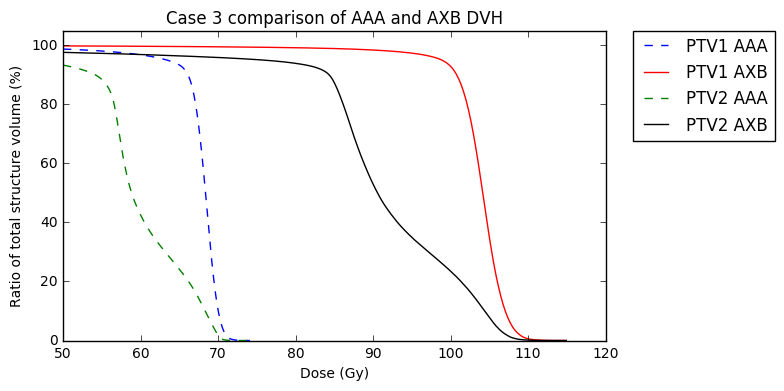

In [7]:
width=7
height=4
plt.figure(figsize=(width, height))

structure = 'PTV1_P2'
plt.plot(AAA.DVH_df[structure], label="PTV1 AAA", color='b', ls='--')
plt.plot(AXB.DVH_df[structure], label="PTV1 AXB",  color='r' )

structure = 'PTV2_P2'
plt.plot(AAA.DVH_df[structure], label="PTV2 AAA", color='g', ls='--')
plt.plot(AXB.DVH_df[structure], label="PTV2 AXB",  color='k' )

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Case 3 comparison of AAA and AXB DVH')
plt.xlabel('Dose (Gy)')
plt.ylabel('Ratio of total structure volume (%)')
plt.ylim([0,105])
plt.xlim([50,120])